<a href="https://colab.research.google.com/github/Tomiwa-31/demo/blob/main/Twitter_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Twitter Sentiment Analysis Dataset: Project Pipeline
#Import Necessary Dependencies
#Read and Load the Dataset
#Exploratory Data Analysis
#Data Visualization of Target Variables
#Data Preprocessing
#Splitting our data into Train and Test sets.
#Transforming Dataset using TF-IDF Vectorizer
#Function for Model Evaluation
#Model Building
#Model Evaluation

In [2]:
from google.colab import files
upload=files.upload()


Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [3]:
import pandas as pd
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df=pd.read_csv("training.1600000.processed.noemoticon.csv",encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
22237,0,1557443303,Sun Apr 19 04:08:47 PDT 2009,NO_QUERY,sugree,"@wiennat yes, i know #barcampbkk3"
1205859,4,1986643016,Sun May 31 19:07:19 PDT 2009,NO_QUERY,BreanicPanic,Watching monsters inc.
461735,0,2174523018,Sun Jun 14 22:43:57 PDT 2009,NO_QUERY,OMGeeItsPam,Marathons over.
178582,0,1966002846,Fri May 29 16:56:34 PDT 2009,NO_QUERY,Krys33,Poor @IMissBradAndJen 's mom just told her she...
807990,4,1469109766,Tue Apr 07 05:14:28 PDT 2009,NO_QUERY,firebirdhouse,"@totzhatz she lives in Denver, but is coming t..."


In [4]:
# utilities
import re
import numpy as np

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
#EXPLORATORY DATA ANALYSIS
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
df.shape


(1600000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df["target"].value_counts()


,count
target,
0,800000
4,800000


In [9]:
#checking for null values
np.sum(df.isnull().any(axis=1))

0

In [10]:
#check the unique values in the target columns
df['target'].unique()

array([0, 4])

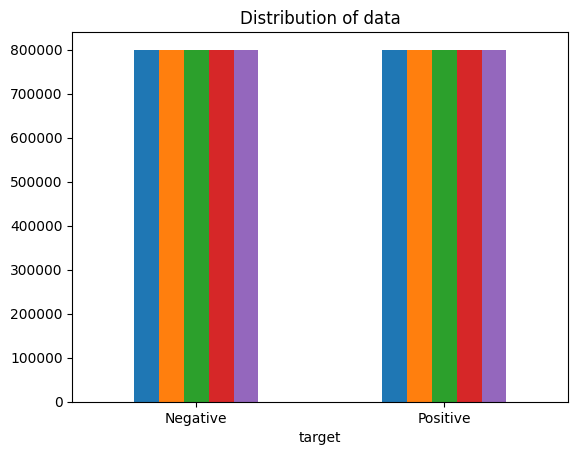

In [11]:
#Plotting the distribution of the dataset
ax=df.groupby("target").count().plot(kind="bar",title="Distribution of data",legend=False)
ax.set_xticklabels(["Negative","Positive"],rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

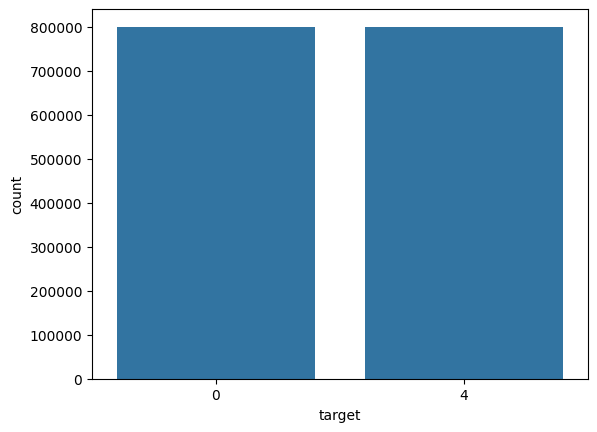

In [12]:
sns.countplot(x='target',data=df)

In [13]:
#STEP5 DATA PREPROCESSING
#Removing Stopwords,removing speial characters,removing punctuation
data=df[["target","text"]]



In [14]:
data["target"]=data["target"].replace(4,1)#change all the values with 4 in the rows to 1


<ipython-input-14-12d1c5bfe71e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["target"]=data["target"].replace(4,1)#change all the values with 4 in the rows to 1


In [15]:
#check unique values of target column
data["target"].unique()

array([0, 1])

In [16]:
#ALRIGHT SO WE HAVE 8000 VALUES SO WE ARE GOING TO TAKE A QUARTER OF IT SO WE CAN RUN IT EASILY ON OUR MACHINE
#WE ALSO MAKE SURE ITS BALANCE WHERE WE HAVE EQUAL NUMBER OF POSITIVE AND NEGATIVE TWEET

In [17]:
data_pos=data[data["target"]==1]#positive dataframe
data_neg=data[data["target"]==0]#negative dataframe


In [18]:
#taking 1/4 of the dataset so we can run it easily
data_pos=data_pos.iloc[:2000]#filters out the first 2000 row
#data_pos
data_neg=data_neg.iloc[:2000]
data_neg

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1995,0,@roxy_yeah yep a loser.
1996,0,and finito! All bathroom contractors been thru...
1997,0,@caitlinaudrey awww! that sucks! are you goin...
1998,0,"Sorry, SF. Rescheduling my SF trip for this co..."


In [19]:
#merge both dataframe
dataset=pd.concat([data_neg,data_pos])

In [20]:
# converting the text data to lower case
dataset["text"]=dataset["text"].str.lower()
dataset


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
801995,1,@fizzyduck five? seems a little bit too late i...
801996,1,ryanodonnell: @attractmode thanks for putting ...
801997,1,@damygeebo carli's my friend
801998,1,i feel so great for starting twitter at suzann...


In [21]:
#REMOVE STOPWORD WITH EITHER SPACY METHOD OR THE MANUAL METHOD OF CREATING A LIST OF STOPWORDS
import spacy
nlp=spacy.load("en_core_web_sm")

In [22]:
#METHOD 1
#create a function for removal of stopwords
#def stopremoval(text):
  #doc=nlp(text)

  #stop_removed=[token.text for token in doc if not token.is_stop]
  #return " ".join(stop_removed)
#Takes to long we go with the manual method



In [23]:
#ways of accessing the stopword dictionary
#stop_words=nlp.Defaults.stop_words
#print(stop_words)

In [24]:
#METHOD 2
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']


In [25]:
stopword=set(stopwordlist)#ensures there is no duplicate in the stopword variable
def clean_stopword(text):
  cleaned=[word for word in str(text).split() if word not in stopword]
  return " ".join(cleaned)

In [26]:
dataset["text"]=dataset["text"].apply(clean_stopword)
dataset

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,upset can't update facebook texting it... migh...
2,0,@kenichan dived many times ball. managed save ...
3,0,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving all. i'..."
...,...,...
801995,1,@fizzyduck five? seems little bit late morning...
801996,1,ryanodonnell: @attractmode thanks putting grea...
801997,1,@damygeebo carli's friend
801998,1,feel great starting twitter suzanne but still ...


In [27]:
#Cleaning and removing urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')  # Matches URLs starting with http, https, or www
    return url_pattern.sub('', text)  # Replaces matched URLs with an empty string
dataset["text"]=dataset["text"].apply(lambda x:remove_urls(x))
dataset

,target,text
0,0,"@switchfoot - awww, that's bummer. shoulda go..."
1,0,upset can't update facebook texting it... migh...
2,0,@kenichan dived many times ball. managed save ...
3,0,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving all. i'..."
...,...,...
801995,1,@fizzyduck five? seems little bit late morning...
801996,1,ryanodonnell: @attractmode thanks putting grea...
801997,1,@damygeebo carli's friend
801998,1,feel great starting twitter suzanne but still ...


In [28]:
#Cleaning and Removing Puncuation
import string
english_punctuation=string.punctuation#stored in a string
def cleaning_punctuations(text):
    translator = str.maketrans('', '', english_punctuation)
    return text.translate(translator)
dataset["text"]=dataset["text"].apply(lambda x:cleaning_punctuations(x))
dataset

,target,text
0,0,switchfoot awww thats bummer shoulda got dav...
1,0,upset cant update facebook texting it might cr...
2,0,kenichan dived many times ball managed save 50...
3,0,whole body feels itchy like fire
4,0,nationwideclass no its not behaving all im mad...
...,...,...
801995,1,fizzyduck five seems little bit late morning b...
801996,1,ryanodonnell attractmode thanks putting great ...
801997,1,damygeebo carlis friend
801998,1,feel great starting twitter suzanne but still ...


In [29]:
#clening and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()


,text
801995,fizzyduck five seems little bit late morning b...
801996,ryanodonnell attractmode thanks putting great ...
801997,damygeebo carlis friend
801998,feel great starting twitter suzanne but still ...
801999,lukestephens said wondering it not wanted it


In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
801995,fizzyduck five seems little bit late morning b...
801996,ryanodonnell attractmode thanks putting great ...
801997,damygeebo carlis friend
801998,feel great starting twitter suzanne but still ...
801999,lukestephens said wondering it not wanted it


In [32]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 14.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=b84eaaa3b370f343ddd5b2cda3cd4c22990ffbe134d73fa6c4e6e9b9c9701a32
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [33]:
#tokenization of text
import swifter

def tokenizer(text):
  doc=nlp(text)
  token_text=[token.text for token in doc]
  return token_text
dataset["text"]=dataset["text"].swifter.apply(tokenizer)

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

In [34]:
#lemmaatization of text
#import swifter
def spacy_lemmatizer(text):
    doc = nlp(" ".join(text))  # Convert list of words to string
    return [token.lemma_ for token in doc]  # Lemmatize each word

dataset['text'] = dataset['text'].swifter.apply(spacy_lemmatizer)


Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

In [35]:
#convert the tokenized(list format text) back to a string in order for it to be accepted by tfidfvectorizer
dataset['text'] = dataset['text'].apply(lambda x: " ".join(x))  # Convert list back to string


In [36]:
#setting the input feauture and target variable
x=dataset.text
y=dataset.target

In [37]:
dataset

,target,text
0,0,switchfoot awww that s bummer shoulda get ...
1,0,upset can not update facebook texting it might...
2,0,kenichan dive many time ball manage save re...
3,0,whole body feel itchy like fire
4,0,nationwideclass no its not behave all I m mad ...
...,...,...
801995,1,fizzyduck five seem little bit late morning bu...
801996,1,ryanodonnell attractmode thank put great event...
801997,1,damygeebo carlis friend
801998,1,feel great start twitter suzanne but still har...


In [ ]:
data_pos

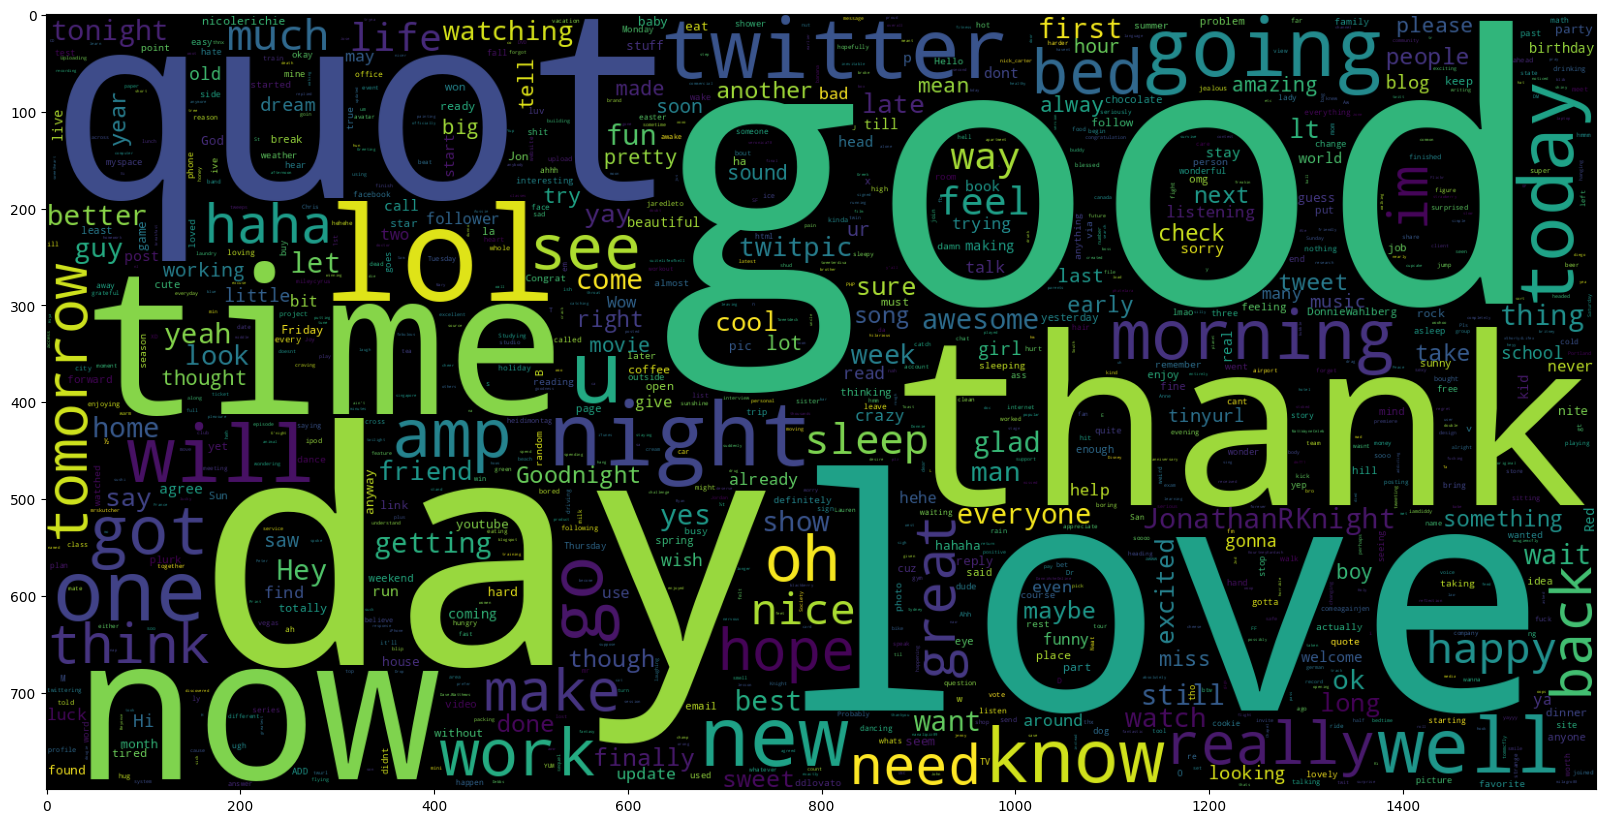

In [38]:
#Using world cloud to determine the most frequent word for the positive text
data_pos["text"]=data_pos["text"].iloc[:800000]
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800,collocations=False).generate(" ".join(data_pos["text"]))
plt.imshow(wc)

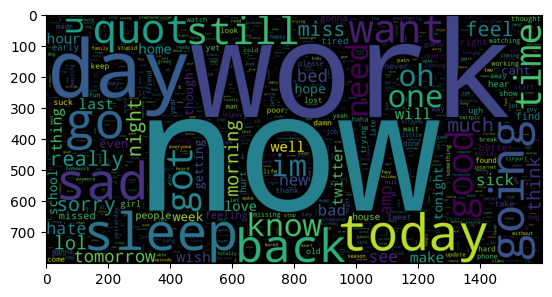

In [39]:
#Plot cloud of word for negative tweet
data_neg["text"]=data_neg["text"].iloc[:800000]
we=WordCloud(max_words=1000,width=1600,height=800,collocations=False).generate(" ".join(data_neg["text"]))
plt.imshow(we)

In [40]:
#splitting our data into training and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_test.shape

((3200,), (800,))

In [41]:
vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=2200)#Extract biagrams in the text
vectorizer.fit(x_train)

TfidfVectorizer(max_features=2200, ngram_range=(1, 2))

In [42]:
x_train=vectorizer.transform(x_train)
x_test=vectorizer.transform(x_test)

In [43]:
#create a funtion for model evaluation
def model_evaluation(model):
  y_pred=model.predict(x_test)
  #print(classification_report(y_test,y_pred))
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
#Model building
#SVC
#Logistic regressiom
#naive bayes

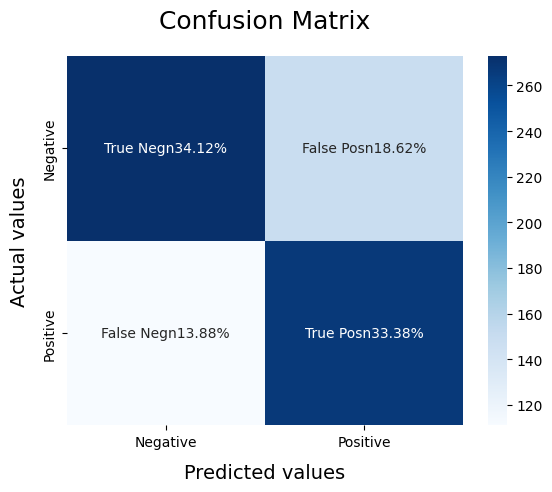

In [44]:
svc_model=LinearSVC(random_state=42)#instantiate the classifier
svc_model.fit(x_train,y_train)
model_evaluation(svc_model)
y_pred=svc_model.predict(x_test)

<Axes: >

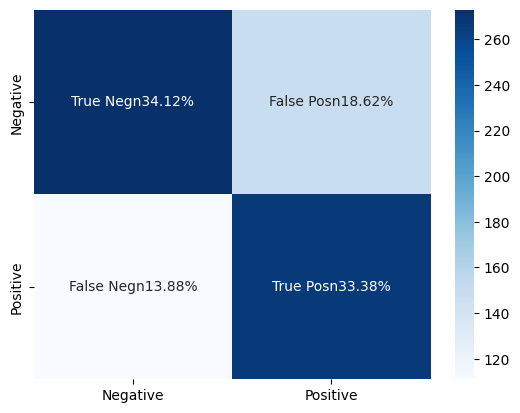

In [45]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)

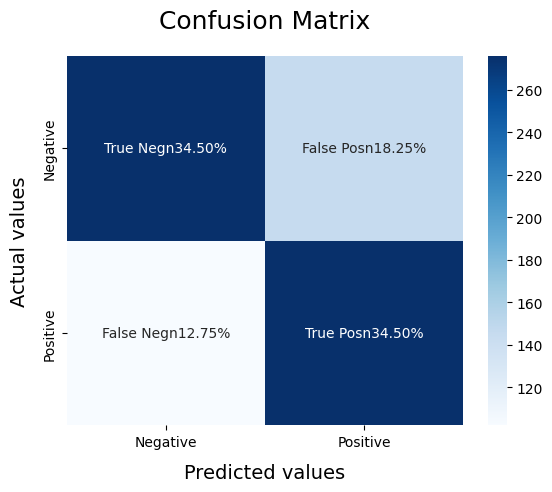

In [46]:
#using loogistic regression model
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
model_evaluation(log_model)
#y_pred1=log_model.predict(x_test)

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
model_evaluation(BNBmodel)
y_pred1 = BNBmodel.predict(x_test)
#y_pred1